-------------------------------
#### Aim : understand the tuning process of a Decision Tree
- credicard data
---------------------------

In [3]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.tree import DecisionTreeClassifier

In [4]:
location  = r'D:\AI-DATASETS\02-MISC-large\creditcard.csv'

In [5]:
# load the training data 
df = pd.read_csv(location)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# copy the predictor variables into X and responses in y
X = df.drop(['Class'], axis=1)
y = df['Class']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

#### Tuning of decision trees

##### 1. max_depth

The maximum depth of the tree. 

- If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.

In [9]:
from sklearn import metrics

In [11]:
max_depths = [ 1,2,3,4,5,6,7,8,9,10]

In [12]:
train_acc = []
test_acc  = []

# for each depth level, try the DEC T
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    
    dt.fit(X_train, y_train)  
    
    # check the model performance using the training samples
    train_pred = dt.predict(X_train)
    acc        = metrics.accuracy_score(y_train, train_pred)
    train_acc.append(acc)
    
    # check the model performance using the testing samples
    test_pred = dt.predict(X_test)
    acc       = metrics.accuracy_score(y_test, test_pred)
    test_acc.append(acc)

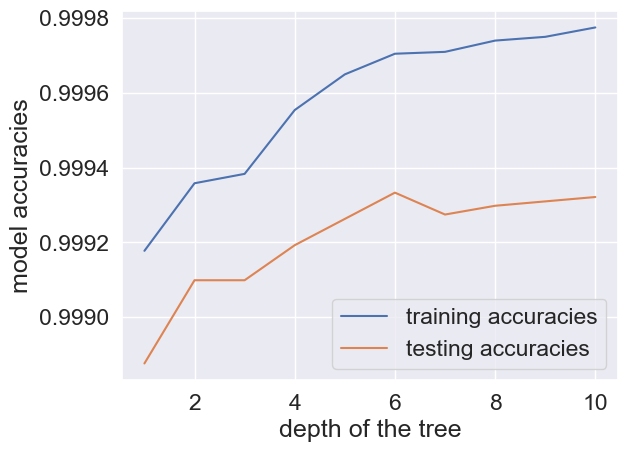

In [13]:
plt.plot(max_depths, train_acc, label='training accuracies')
plt.plot(max_depths, test_acc,  label='testing accuracies')
plt.xlabel('depth of the tree')
plt.ylabel('model accuracies')
           
plt.legend();

In [15]:
import graphviz 
from sklearn.tree import export_graphviz

In [17]:
feature_names = df.drop('Class' , 1).columns
class_names   = y.unique()

C:\Users\bhupe\AppData\Local\Temp\ipykernel_11408\2137111754.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  feature_names = df.drop('Class' , 1).columns


In [22]:
class_names

array([0, 1], dtype=int64)

In [25]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)    

dot_data = export_graphviz(dt, 
                            out_file=None, 
                            feature_names=feature_names,  
                            class_names=np.array(['0', '1']),
                            filled=True, 
                            rounded=True,  
                            special_characters=True)  

graph = graphviz.Source(dot_data)  

tree_name = r"C:\Users\bhupe\Desktop\test.pdf"

graph.render(tree_name) 


'C:\\Users\\bhupe\\Desktop\\test.pdf.pdf'